# Importing Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Loading the Dataset

In [153]:
Data = pd.read_csv(r"C:\Users\Lapotop Land\Downloads\Titanic-Dataset.csv")

In [154]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

### Understanding the Data Structure

In [155]:
Data.shape

(891, 12)

In [156]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [158]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Checking for Missing Values

In [159]:
# Check for missing values
print(Data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


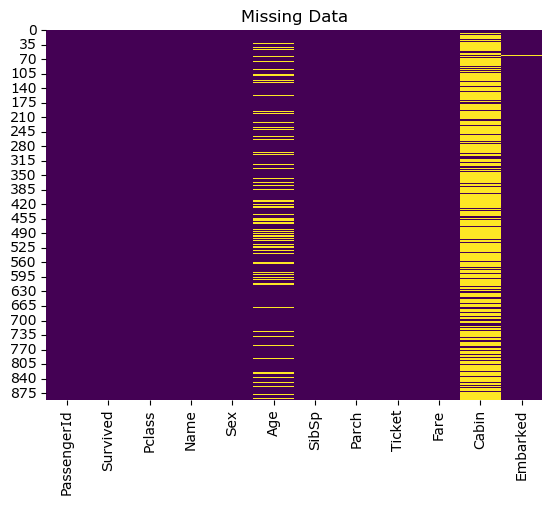

In [160]:
# Visualize the missing data
sns.heatmap(Data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

### Statistical Summary

In [161]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Distribution of the Target Variable (Survived)

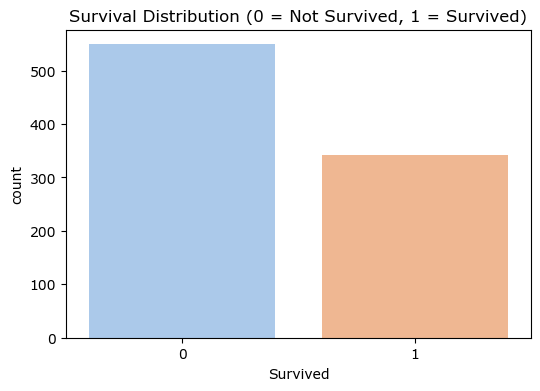

In [162]:
# Countplot of the Survived column
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=Data, palette='pastel')
plt.title('Survival Distribution (0 = Not Survived, 1 = Survived)')
plt.show()

In [163]:
# Percentage of survivors
survival_rate = Data['Survived'].value_counts(normalize=True) * 100
print(f"Survival Rate: {survival_rate[1]:.2f}% of passengers survived.")

Survival Rate: 38.38% of passengers survived.


### Analyzing the impact of Features on Survival

### Gender and Survival:

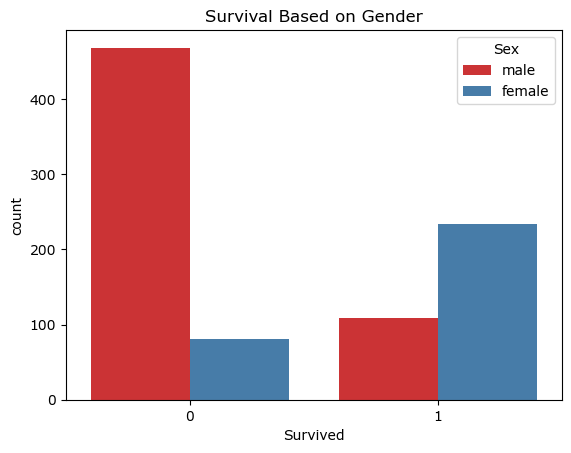

In [164]:
# Survival based on gender 
sns.countplot(x='Survived', hue='Sex', data=Data, palette='Set1')
plt.title('Survival Based on Gender')
plt.show()

### Passenger and Survival:

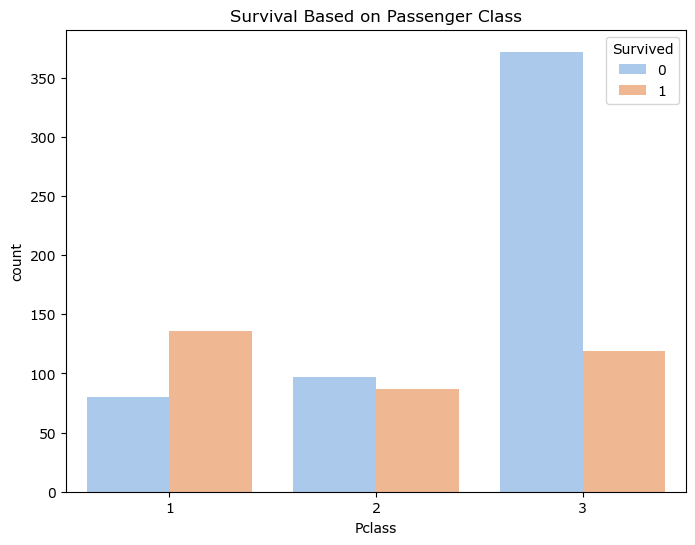

In [165]:
# Survival based on passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=Data, palette='pastel')
plt.title('Survival Based on Passenger Class')
plt.show()

### Age Distribution:

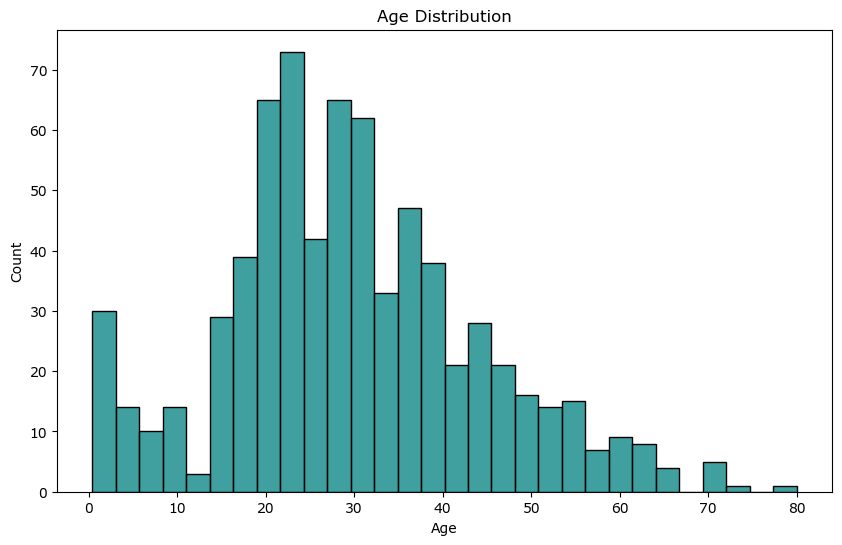

In [166]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(Data['Age'].dropna(), kde=False, bins=30, color='teal' )
plt.title('Age Distribution')
plt.show()

### Age vs. Survival:

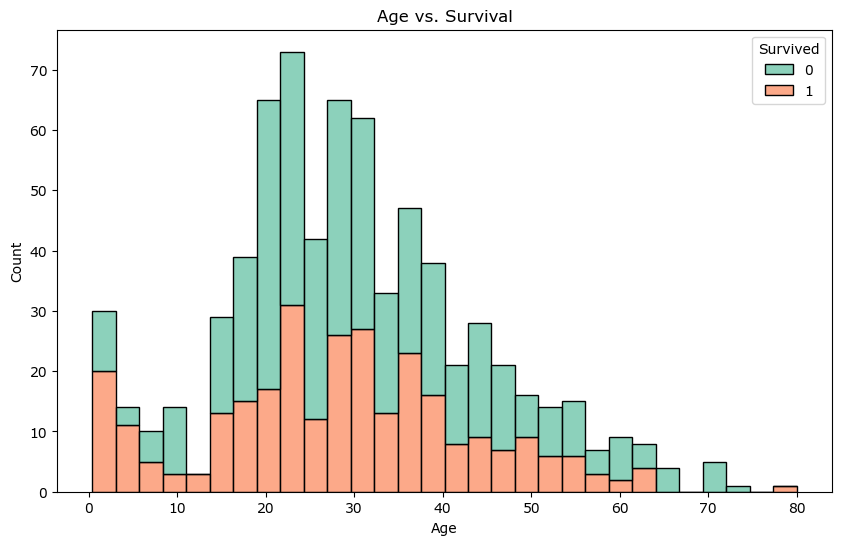

In [167]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Data, x='Age', hue='Survived', multiple='stack', bins=30, palette='Set2')
plt.title('Age vs. Survival')
plt.show()

### Embarked Port and Survival:

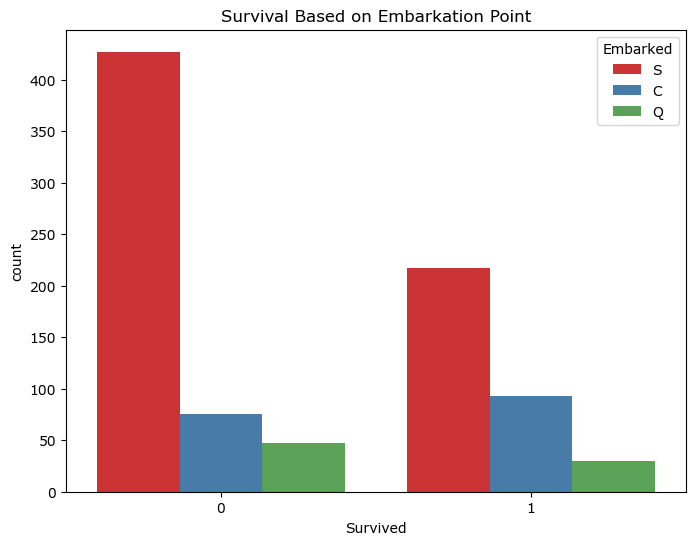

In [168]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=Data, palette='Set1')
plt.title('Survival Based on Embarkation Point')
plt.show()

### Siblings/Spouses Present vs. Survival 

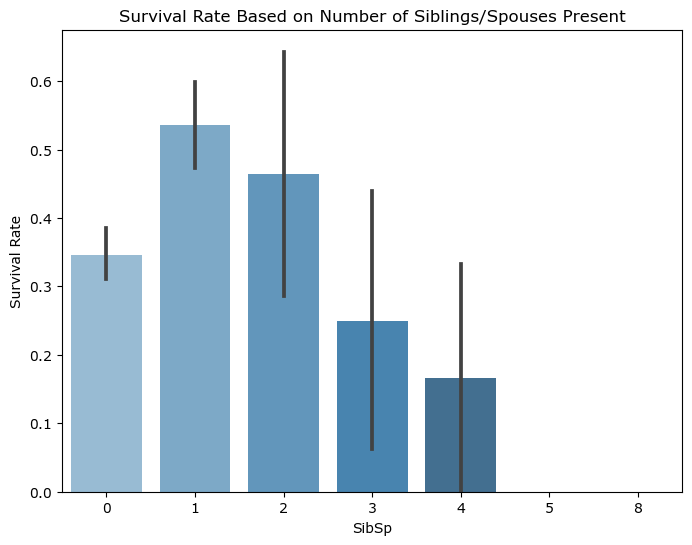

In [169]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x='SibSp', y='Survived', data=Data, palette='Blues_d') 
plt.title('Survival Rate Based on Number of Siblings/Spouses Present') 
plt.ylabel('Survival Rate') 
plt.show()

# Data Preprocessing

### Handling Missing Values

In [170]:
Data['Age'] = Data['Age'].fillna(Data['Age'].median())
Data['Embarked'] = Data['Embarked'].fillna(Data['Embarked'].mode()[0])

### Dropping Columns

In [171]:
Data = Data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [172]:
print(Data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Label Encoding

In [173]:
label = LabelEncoder()
Data['Sex'] = label.fit_transform(Data['Sex'])
Data['Embarked'] = label.fit_transform(Data['Embarked'])

### Feature Scaling

In [174]:
scaler = StandardScaler()
Data[['Age', 'Fare']] = scaler.fit_transform(Data[['Age', 'Fare']])

### Splitting Data into X and y

In [177]:
X = Data.drop('Survived', axis=1)
y = Data['Survived']

# Splitting the Data into Training and Test Sets

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

## Logistic Regression Model

In [179]:
# Training Logistic Regression Model 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

LogisticRegression()

In [180]:
# Predictions 
y_pred_logreg = logreg.predict(X_test) 

In [181]:
# Evaluation 
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg)) 

Logistic Regression Accuracy: 0.8134328358208955


In [182]:
print("Classification Report:\n", classification_report(y_test, y_pred_logreg)) 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## Random Forest Classifier

In [191]:
# Training Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [192]:
 # Predictions 
y_pred_rf = rf.predict(X_test) 

In [193]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.7835820895522388


In [194]:
 print("Classification Report:\n", classification_report(y_test, y_pred_rf)) 

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



## Comparing Model Accuracies 

In [195]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Random Forest'], 'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                         accuracy_score(y_test, y_pred_rf)] }) 
print(models) 

                 Model  Accuracy
0  Logistic Regression  0.813433
1        Random Forest  0.783582


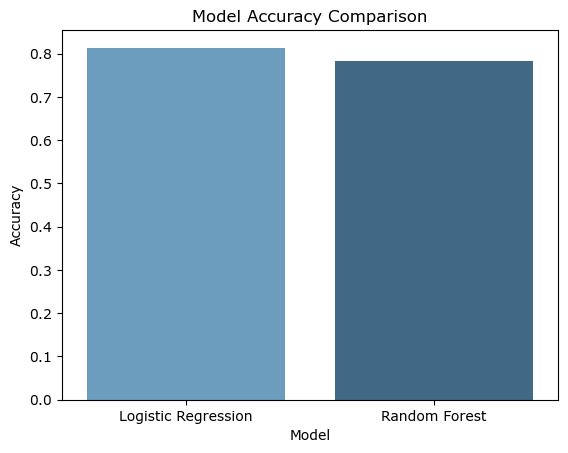

In [196]:
# Plotting the comparison 
sns.barplot(x='Model', y='Accuracy', data=models, palette='Blues_d') 
plt.title('Model Accuracy Comparison')
plt.show()